D:\OneDrive - Cardiff University\05 - Python\09 - Climate Change
D:
OneDrive - Cardiff University
D:\OneDrive - Cardiff University\


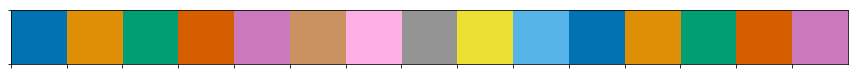

In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys

%matplotlib inline

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
fig_format = "png"
dpi = 600
figsize = (12, 6.5)
figsize_map = (10, 10)
sns.palplot(sns.color_palette())

print(os.getcwd())
flag = False
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "OneDrive - Cardiff University":
        flag=True   
        break

if not flag:
    computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)

In [13]:
path = computer_path + r"04 - Projects/14 - Growth project/UK data"
file = "UK_Carbon_Footprint_1997_2016 (version 1).xlsx"

In [14]:
lookup_df = pd.read_excel(path+os.path.sep+file, sheet_name = "Lookup")
lookup_df.fillna(0, inplace=True)
lookup_df.index = lookup_df.index.droplevel(1)

In [15]:
lookup_df.columns

Index(['Food', 'Fashion', 'Electronics', 'Other goods', 'Services', 'Energy',
       'Construction', 'Travel and transport services'],
      dtype='object')

In [16]:
lookup = pd.read_excel(path+os.path.sep+file, sheet_name = "Lookup", header=0)
lookup.fillna(0, inplace=True)
lookup.head()

,,Food,Fashion,Electronics,Other goods,Services,Energy,Construction,Travel and transport services
"Electricity, transmission and distribution",35.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"Products of agriculture, hunting and related services",01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Air transport services,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Coke and refined petroleum products,19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Water transport services,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
extra_data = pd.read_excel(path+os.path.sep+file, sheet_name = "Summary_stream_97-16", header=3)
heating = extra_data["Stream 5 - heating"].values
travel = extra_data["Stream 5 - travel"].values

In [18]:
# idx = pd.IndexSlice
# data = data.loc[:, idx[:, 'Households']].copy()

In [19]:
dict_households_GHG = {}
for year in range(1997, 2016+1, 1):
    print(year)
    data = pd.read_excel(path+os.path.sep+file, sheet_name = str(year)+"_GHG", header=[0, 2])
    # data.index = data.index.droplevel([0, 2])
    data.set_index(data.columns[0], inplace=True, drop=True)
    data.drop(data.columns[0], axis=1, inplace=True)
    data = data.iloc[:, :49]
    idx = pd.IndexSlice
    data = data.loc[:, idx[:, 'Households']].copy()

    dict_temp_result = {}
    for sector in lookup.columns:
#         print(sector)
        idx = lookup[lookup[sector]==1].index.get_level_values(0)
        dict_temp_result[sector] = data.loc[idx, :].sum().sum()
    dict_households_GHG[year] = dict_temp_result

1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [20]:
households_GHG_df = pd.DataFrame(dict_households_GHG)
# households_GHG_df.plot.area(stacked=True)

In [21]:
households_GHG_df

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Construction,1025.340860,905.236660,965.822570,817.818100,937.537302,879.237406,909.082146,1159.990270,1282.576140,1219.094050,1212.785890,973.792293,791.580165,738.576688,768.389617,869.42972,848.022027,803.851873,848.052685,909.151589
Electronics,8905.671700,9979.438300,10334.874400,10065.945000,10044.026500,10954.473900,12912.756000,14692.965600,14288.121200,14982.061100,14728.155600,11968.792500,11727.200300,11143.807200,11046.793700,11154.34005,10883.782594,11329.473530,12267.134370,11028.046050
Energy,99920.737814,99802.157282,95341.033310,99004.749158,103087.700740,101626.707870,104471.865200,110460.053350,108479.812804,123408.362638,125351.307670,137322.421950,117282.061440,116522.617850,113062.100120,118909.40999,126048.926190,111607.565510,106922.064528,89298.126618
Fashion,13463.330800,14623.712000,13856.071000,15839.562900,16119.179100,17435.041800,18877.029500,19615.138700,20455.355900,20661.000400,21278.676000,18658.343000,15887.580900,15574.884000,14159.202400,13059.45410,12743.775200,12905.462940,14000.866300,12693.482480
Food,127041.349057,133488.073704,134640.835933,134323.796877,133964.904992,138721.370008,132582.770388,140611.476867,141162.271691,136232.643527,130516.061457,123178.799471,112545.561279,111162.213354,109924.130055,108802.09585,108088.801873,107845.996660,113645.046212,107459.801360
Other goods,94592.581342,99673.944189,99643.062860,104682.949282,109033.782548,111578.357435,116456.242855,127793.815104,126319.206077,129406.798355,131052.574189,114869.028467,91370.191985,94753.105135,97726.310460,98829.45622,94189.880671,92032.612059,95879.052994,86921.878297
Services,107693.301100,115806.677236,114889.024226,115778.171332,115762.732998,114712.780534,115938.934017,116614.886689,119897.927315,111914.043536,112894.078182,107427.068075,91339.844319,90835.527046,89357.294532,90147.67317,88058.125701,90243.139603,96195.597503,91858.406799
Travel and transport services,41748.941780,47918.781200,50138.128300,52909.435700,53880.072510,57351.600310,58613.237600,63462.655000,66886.818200,66518.737900,68293.643100,64320.485300,58924.070050,58781.393300,60221.957090,60704.16294,60268.193380,61176.525394,64644.241595,62829.363372


In [22]:
households_GHG_df.loc["Travel and transport services", :] = households_GHG_df.loc["Travel and transport services", :]+travel
households_GHG_df.loc["Energy", :] = households_GHG_df.loc["Energy", :]+heating
households_GHG_df

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Construction,1025.340860,905.236660,965.822570,817.818100,937.537302,879.237406,909.082146,1159.990270,1282.576140,1219.094050,1212.785890,973.792293,791.580165,738.576688,768.389617,869.42972,848.022027,803.851873,848.052685,909.151589
Electronics,8905.671700,9979.438300,10334.874400,10065.945000,10044.026500,10954.473900,12912.756000,14692.965600,14288.121200,14982.061100,14728.155600,11968.792500,11727.200300,11143.807200,11046.793700,11154.34005,10883.782594,11329.473530,12267.134370,11028.046050
Energy,188581.737814,191047.557282,186168.433310,190405.849158,197167.900740,192088.907870,196163.865200,203864.553350,197912.012804,210302.162638,208695.407670,223197.921950,200170.461440,210274.117850,188569.700120,202161.90999,211231.326190,183800.865510,182516.764528,167217.426618
Fashion,13463.330800,14623.712000,13856.071000,15839.562900,16119.179100,17435.041800,18877.029500,19615.138700,20455.355900,20661.000400,21278.676000,18658.343000,15887.580900,15574.884000,14159.202400,13059.45410,12743.775200,12905.462940,14000.866300,12693.482480
Food,127041.349057,133488.073704,134640.835933,134323.796877,133964.904992,138721.370008,132582.770388,140611.476867,141162.271691,136232.643527,130516.061457,123178.799471,112545.561279,111162.213354,109924.130055,108802.09585,108088.801873,107845.996660,113645.046212,107459.801360
Other goods,94592.581342,99673.944189,99643.062860,104682.949282,109033.782548,111578.357435,116456.242855,127793.815104,126319.206077,129406.798355,131052.574189,114869.028467,91370.191985,94753.105135,97726.310460,98829.45622,94189.880671,92032.612059,95879.052994,86921.878297
Services,107693.301100,115806.677236,114889.024226,115778.171332,115762.732998,114712.780534,115938.934017,116614.886689,119897.927315,111914.043536,112894.078182,107427.068075,91339.844319,90835.527046,89357.294532,90147.67317,88058.125701,90243.139603,96195.597503,91858.406799
Travel and transport services,106513.241780,112515.481200,115821.228300,118414.735700,120637.672510,126561.300310,127272.537600,133700.655000,137582.318200,137132.237900,139267.743100,133746.085300,127486.770050,125723.993300,126667.057090,127060.56294,126965.393380,128230.925394,132310.141595,131632.963372


In [23]:
population = pd.read_csv(path+os.path.sep+"population_uk.csv", header=0)
idx_drop = [x for x in range(0, 6,1)]
population.drop(idx_drop, inplace=True)
population.set_index("Title", drop=True, inplace=True)
population = population.astype(int)
pop_values = population.loc["1997":"2016", "United Kingdom population mid-year estimate"].values

In [24]:
# Tonnes of CO2 per capita in UK
households_GHG_df = households_GHG_df/pop_values*1000

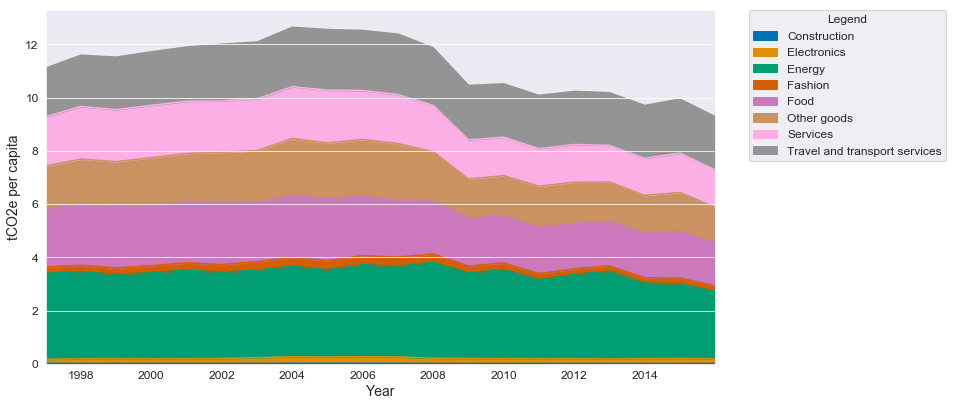

In [31]:
f, ax = plt.subplots(figsize=figsize)
sns.set_style("darkgrid")
households_GHG_df.T.plot.area(ax=ax, stacked=True)
ax.set_axisbelow(False)

ax.xaxis.grid(False)
ticks = [x for x in range(1998, 2016, 2)]
labels =[ str(x) for x in ticks]
plt.xticks(ticks, labels)
ax.set_xlabel("Year")
ax.set_ylabel("tCO2e per capita")
ax.margins(0, 0)
lgd = ax.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.savefig(path+os.path.sep+"GHG_per_capita_UK."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [26]:
households_GHG_100_df = households_GHG_df.T.copy()
households_GHG_100_df = households_GHG_100_df.divide(households_GHG_100_df.sum(axis=1), axis=0)

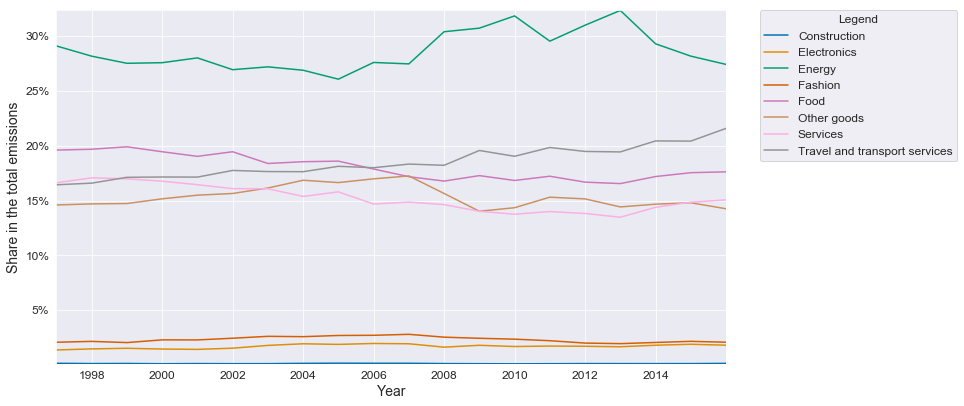

In [32]:
f, ax = plt.subplots(figsize=figsize)
households_GHG_100_df.plot(ax=ax)
plt.xticks(ticks, labels)

ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:.0f}%'.format(x*100)))
ax.set_ylabel("Share in the total emissions")
ax.set_xlabel("Year")
ax.margins(0,0)
lgd = ax.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.savefig(path+os.path.sep+"share_emissions_UK."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [30]:
0.215890+0.176244+0.274252

0.6663859999999999

In [29]:
households_GHG_100_df

,Construction,Electronics,Energy,Fashion,Food,Other goods,Services,Travel and transport services
1997,0.001583,0.013747,0.291104,0.020783,0.196107,0.146018,0.166240,0.164419
1998,0.001335,0.014718,0.281764,0.021568,0.196873,0.147003,0.170796,0.165942
1999,0.001428,0.015281,0.275267,0.020487,0.199079,0.147331,0.169874,0.171252
2000,0.001185,0.014581,0.275819,0.022945,0.194579,0.151642,0.167715,0.171534
2001,0.001332,0.014274,0.280200,0.022907,0.190381,0.154951,0.164513,0.171441
2002,0.001233,0.015365,0.269435,0.024455,0.194579,0.156506,0.160903,0.177522
2003,0.001261,0.017907,0.272029,0.026178,0.183858,0.161495,0.160778,0.176495
2004,0.001530,0.019382,0.268932,0.025876,0.185490,0.168582,0.153835,0.176374
2005,0.001690,0.018827,0.260788,0.026954,0.186009,0.166450,0.157989,0.181292
2006,0.001600,0.019665,0.276041,0.027120,0.178818,0.169859,0.146898,0.179999
